In [1]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu:

In [2]:
dades = pd.read_csv("NouFitxer.csv")

del dades["Unnamed: 0"]

dades.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
AvSpeed              0
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(dades, train_size = 0.8, random_state = 1)

In [4]:
df_train

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,Distance,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AvSpeed
768032,2,15,5,1436.0,1424,1517.0,1500,NW,101.0,96.0,...,490,0,N,0,12.0,0.0,5.0,0.0,0.0,5.975610
701679,5,9,5,843.0,735,1031.0,947,XE,108.0,132.0,...,643,0,N,0,44.0,0.0,0.0,0.0,0.0,6.989130
821242,1,5,6,1559.0,1505,1734.0,1635,WN,95.0,90.0,...,407,0,N,0,24.0,0.0,5.0,0.0,30.0,5.217949
536585,7,9,3,1737.0,1702,1947.0,1930,FL,130.0,148.0,...,925,0,N,0,0.0,0.0,0.0,0.0,17.0,7.974138
141527,7,8,2,1931.0,1847,16.0,2207,UA,225.0,140.0,...,865,0,N,0,0.0,0.0,85.0,0.0,44.0,7.393162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836489,6,13,5,1455.0,1430,1728.0,1659,9E,93.0,89.0,...,381,0,N,0,25.0,0.0,4.0,0.0,0.0,5.772727
491263,9,26,5,1126.0,910,1343.0,1105,MQ,137.0,115.0,...,544,0,N,0,0.0,117.0,22.0,0.0,19.0,6.112360
470924,7,31,4,2023.0,1735,2243.0,1943,EV,140.0,128.0,...,640,0,N,0,0.0,0.0,180.0,0.0,0.0,5.333333
491755,10,20,1,1615.0,1525,1832.0,1735,XE,137.0,130.0,...,529,0,N,0,8.0,0.0,7.0,0.0,42.0,5.688172


In [5]:
print(df_train["CRSElapsedTime"].mean())
print(df_train["CRSElapsedTime"].median())
print(df_train["CRSElapsedTime"].std())

print(df_train["AvSpeed"].mean())
print(df_train["AvSpeed"].median())
print(df_train["AvSpeed"].std())


131.76520506217497
115.0
69.53745225204044
6.469580735123464
6.586956521739131
1.8048422396070791


In [6]:
print(df_test["CRSElapsedTime"].mean())
print(df_test["CRSElapsedTime"].median())
print(df_test["CRSElapsedTime"].std())

print(df_test["AvSpeed"].mean())
print(df_test["AvSpeed"].median())
print(df_test["AvSpeed"].std())

# We can see that the train and test descriptive measures are very similar, which is normal considering their size

131.75932472404588
115.0
69.51014847586009
6.468681622688244
6.587912087912088
1.344182123517918


Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...):

Resumeix les noves columnes generades de manera estadística i gràfica:

In [8]:
# Standarisation of distance variable

# Data before pre-processing:

print(df_test["Distance"].mean())
print(df_test["Distance"].median())
print(df_test["Distance"].std())

741.8209765208538
595.0
559.9310010308765


(array([1.04571e+05, 8.67850e+04, 3.18790e+04, 1.48240e+04, 8.05400e+03,
        2.95200e+03, 1.42000e+02, 1.26000e+02, 8.60000e+01, 7.90000e+01]),
 array([  11. ,  506.1, 1001.2, 1496.3, 1991.4, 2486.5, 2981.6, 3476.7,
        3971.8, 4466.9, 4962. ]),
 <BarContainer object of 10 artists>)

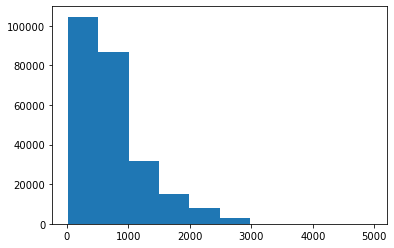

In [9]:
plt.hist(df_test["Distance"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe89296e400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe89296eac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe89296e0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe892bc01c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe892bc0520>],
 'means': []}

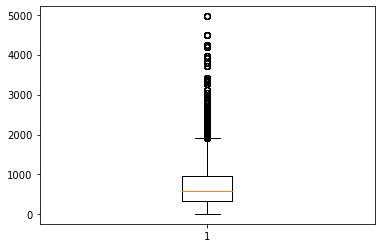

In [10]:
plt.boxplot(df_test["Distance"])

# Boxplot shows that we need to supress some outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe894d0bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe894d19490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe894d0ba30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe894d19b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe894d19eb0>],
 'means': []}

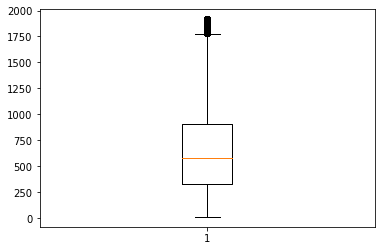

In [11]:
Q1= df_test["Distance"].quantile(0.25)
Q3 = df_test["Distance"].quantile(0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

df_test_filtered = df_test[(df_test["Distance"] > lower) & (df_test["Distance"] < upper)]

plt.boxplot(df_test_filtered["Distance"])

(array([23446., 53496., 43078., 39479., 26786., 21182.,  9433.,  7935.,
         6455.,  5333.]),
 array([-1.55289506, -1.09223028, -0.6315655 , -0.17090072,  0.28976406,
         0.75042884,  1.21109361,  1.67175839,  2.13242317,  2.59308795,
         3.05375273]),
 <BarContainer object of 10 artists>)

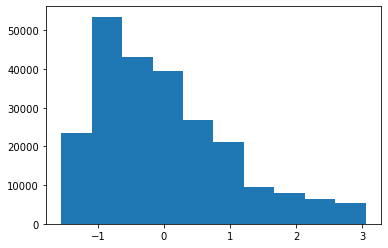

In [12]:
from sklearn import preprocessing
import numpy as np

arr = np.array(df_test_filtered["Distance"])

distance_1d_arr = arr.reshape(-1, 1)

distance_test_scaled = preprocessing.StandardScaler().fit_transform(distance_1d_arr)

plt.hist(distance_test_scaled)

# Data standarised: mean of 0, standard deviation of 1


In [13]:
# Delay data normalisation

print(df_test["ArrDelay"].mean())
print(df_test["ArrDelay"].median())
print(df_test["ArrDelay"].std())

63.40265653432092
43.0
60.666567987720214


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe896452670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe896452d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe896452310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe89645d430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe89645d790>],
 'means': []}

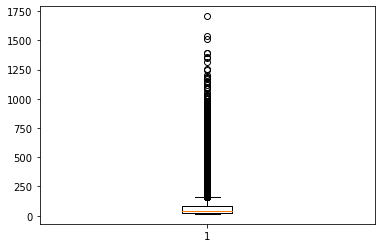

In [15]:
plt.boxplot(df_test["ArrDelay"])

# Serious outliers but will not delete them to avoid losing important data

(array([2.26345e+05, 9.26100e+03, 7.94000e+02, 1.16000e+02, 5.70000e+01,
        2.70000e+01, 1.30000e+01, 5.00000e+00, 3.00000e+00, 2.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

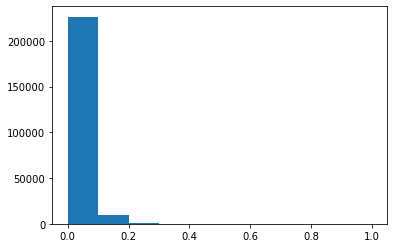

In [16]:

arr = np.array(df_test_filtered["ArrDelay"])

delay_1d_arr = arr.reshape(-1, 1)

delay_test_scaled = preprocessing.MinMaxScaler().fit_transform(delay_1d_arr)

plt.hist(delay_test_scaled)

# Data normalised: Most of the data is concentrated on the lower values, under 2.5 hours of delay


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe896428ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe8906dc1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe896428760>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe894cea460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe894d24790>],
 'means': []}

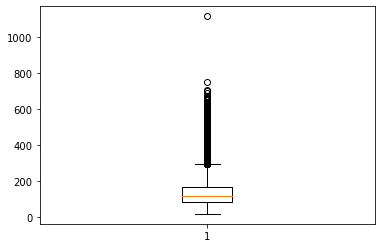

In [18]:
# Discretisation ActualElapsedTime

plt.boxplot(df_test["ActualElapsedTime"])

In [24]:
bins = [0, 50, 200, 300, np.inf]
labels = ['very short', 'normal', 'long', 'super long']

transformer = preprocessing.FunctionTransformer(
    pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
)

discrete_duration = transformer.fit_transform(df_test["ActualElapsedTime"])

discrete_duration.value_counts()

normal        202622
long           28206
super long     10102
very short      8568
Name: ActualElapsedTime, dtype: int64

In [35]:
# Binarisation of days into weekend and weekdays

arr = np.array(df_test_filtered["DayOfWeek"])

days_1d_arr = arr.reshape(-1, 1)

binarise = preprocessing.Binarizer(threshold = 6)

binarised_days = binarise.fit_transform(days_1d_arr)

binarised_df = pd.DataFrame(binarised_days)

binarised_df.value_counts()



0    201602
1     35021
dtype: int64